<a href="https://colab.research.google.com/github/akumuyi/PCA_Formative_1-Peer_Pair_22/blob/main/PCA_Formative_1%5BPeer_Pair_22%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [21]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = "/content/fuel_econ.csv"
df = pd.read_csv(file_path)

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
data_numeric = df[numeric_cols].values

# Compute mean and standard deviation
mean = np.mean(data_numeric, axis=0)
std_dev = np.std(data_numeric, axis=0)

# Standardize the data
standardized_data = (data_numeric - mean) / std_dev

# Display first 5 rows of standardized data
print(standardized_data[:5])


[[-1.73714048 -1.47583548  0.28310163  0.65053594  1.46709627 -1.21737766
  -0.85996012 -0.85242986 -1.29062982 -1.39247459 -1.00832279  1.02283829
  -0.95057953 -0.94575548]
 [-1.73668367 -1.47583548 -0.78181585 -0.72799833  1.86476224 -1.21737766
   0.00642675 -0.11743408  0.18494654 -0.03920038  0.07186379 -0.29854998
   0.1886082   0.1942578 ]
 [-1.73622685 -1.47583548  0.28310163  0.49736547  1.86476224 -1.21737766
  -0.69441634 -0.75324472 -0.5920197  -0.85174957 -0.68633929  0.56793413
  -0.38098566 -0.37574884]
 [-1.73577004 -1.47583548  0.28310163  0.49736547  1.86476224 -1.21737766
  -0.78280029 -0.830286   -0.82738386 -1.02758796 -0.81865124  0.752062
  -0.38098566 -0.37574884]
 [-1.73531322 -1.47583548 -0.78181585 -0.42165738 -0.62727784  0.73489021
   0.47108294  0.43314691  0.96751585  0.99253135  0.64805881 -0.72096098
   1.32779592  1.33427108]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [18]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
print(cov_matrix)

[[ 1.00025458  0.98591866 -0.06011148 -0.07468488 -0.00657025 -0.02195656
   0.09182316  0.09124849  0.0906161   0.09538375  0.09382686 -0.09974229
  -0.1279056  -0.12235207]
 [ 0.98591866  1.00025458 -0.05532701 -0.07044161  0.00623397 -0.03365174
   0.06806739  0.06675938  0.07330836  0.07766039  0.07201181 -0.0811853
  -0.1498676  -0.14517775]
 [-0.06011148 -0.05532701  1.00025458  0.93411019  0.24763384 -0.00426546
  -0.69327904 -0.66619842 -0.76646982 -0.77169964 -0.73821112  0.84848979
  -0.78405759 -0.78201448]
 [-0.07468488 -0.07044161  0.93411019  1.00025458  0.2594021   0.02207729
  -0.71366074 -0.6863403  -0.78418374 -0.78865771 -0.75859024  0.85559254
  -0.7936343  -0.79141752]
 [-0.00657025  0.00623397  0.24763384  0.2594021   1.00025458 -0.66581137
  -0.27817962 -0.27261515 -0.29688365 -0.29858023 -0.29095711  0.28727323
  -0.2961638  -0.29323103]
 [-0.02195656 -0.03365174 -0.00426546  0.02207729 -0.66581137  1.00025458
   0.03519659  0.03787859  0.07497068  0.07746161  0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [20]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
print(f'Eigenvalues: {eigenvalues}')
print(f'Eigenvectors: {eigenvectors}')

Eigenvalues: [8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]
Eigenvectors: [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.690081

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [22]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices of sorted eigenvalues (descending order)
sorted_eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

# Display sorted eigenvectors
print(sorted_eigenvectors)


[[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.69008152e-01
  -1.12579685e-02  5.20085469e-04  2.41804525e-01  7.26076226e-01
   5.26897639e-02  1.88707728e-02  2.64926668e-03  2.74345123e-03
   1.81240405e-02  5.96415755e-03]
 [-1.13744496e-01 -6.35462585e-02 -6.68453743e-01  1.11921299e-01
  

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [24]:
# Select the number of components to retain 95% of variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = 2  # Select the number of components

# Select top principal components
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project data onto the selected principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display first 5 rows of the reduced data
print(reduced_data[:5])


[[-3.19146207  1.98769416]
 [ 0.38752701  1.99194578]
 [-2.09148498  2.03743394]
 [-2.37914076  2.06380156]
 [ 2.5972681   2.50420206]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [30]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data


Reduced Data Shape: (3929, 2)
[[-3.19146207  1.98769416]
 [ 0.38752701  1.99194578]
 [-2.09148498  2.03743394]
 [-2.37914076  2.06380156]
 [ 2.5972681   2.50420206]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

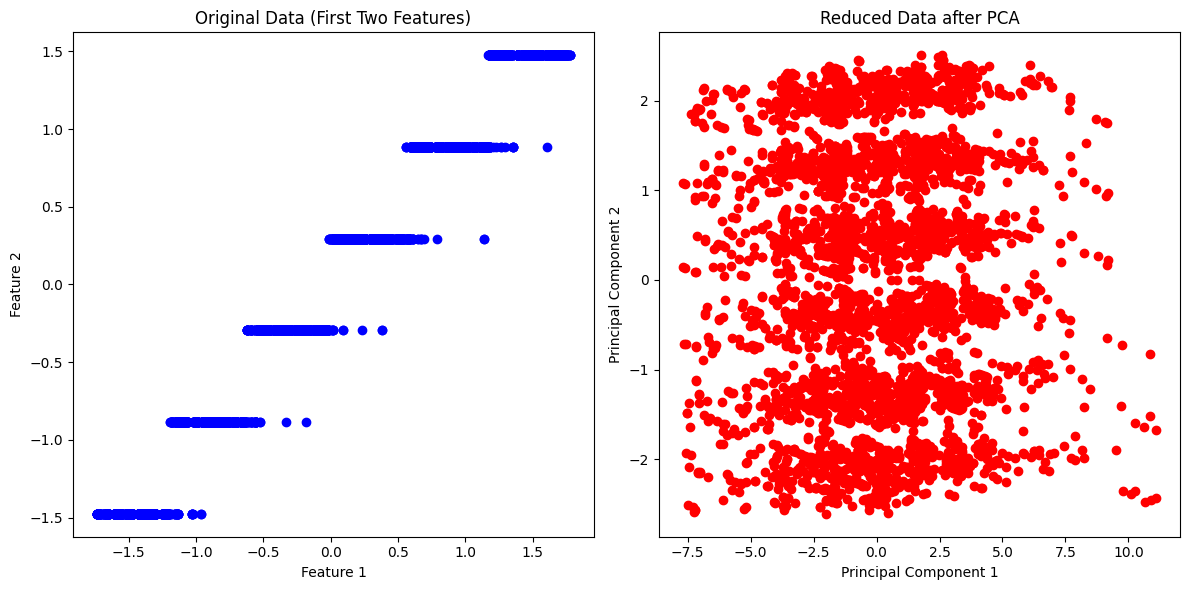

In [41]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Plotting the first subplot
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c='blue')
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data after PCA
plt.subplot(1, 2, 2)  # Plotting the second subplot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='red')
plt.title('Reduced Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


